# QUI SONT LES INSCRITS ?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

from kiblib.utils.db import DbConn

In [2]:
db_conn = DbConn().create_engine()

In [3]:
# PARAMETRAGE DES GRAPHIQUES MATPLOLIB

params = {'axes.titlesize': 15,
          'axes.titleweight':'bold',
          'axes.grid':'y',
          'axes.labelweight':'bold',
          'axes.labelsize':15,
          'legend.shadow':True,
          'figure.subplot.hspace': 0.4,
          'figure.figsize':(15,5)
         }

plt.rcParams.update(params)

In [4]:
# DÉFINITION D'UNE FONCTION POUR AFFICHER LES % DES PIEPLOT + VALEURS BRUTES

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

In [5]:
query = """SELECT MAX(date_extraction) AS date_max
FROM statdb.stat_adherents sa"""

df_date_max = pd.read_sql(query,db_conn)

In [6]:
# On met dans une variable la valeurs date qui nous intéresse :

date_max = df_date_max.iloc[0]["date_max"]
date_max = date_max.isoformat()
#date_max

In [7]:
timestamp = date.today().strftime("%d-%m-%Y")
#timestamp

In [8]:
query = f"SELECT * FROM statdb.stat_adherents sa WHERE date_extraction = '{date_max}'"

In [9]:
inscrits = pd.read_sql(query,db_conn,parse_dates="date_max")
#inscrits

### Nombre d'inscrits à la médiathèque de Roubaix

In [97]:
total_inscrits = len(inscrits)

print(f"La médiathèque de Roubaix compte {total_inscrits} personnes inscrites au {date_max}")

La médiathèque de Roubaix compte 15108 personnes inscrites au 2024-01-31


In [98]:
inscrits["nombre_inscrits"] = 1

In [99]:
# ON CREE UN DATAFRAME EN NE RETENANT QUE LA COLONNE ÂGE QUI NOUS INTERESSE

inscrits_par_age = pd.DataFrame(inscrits,columns=["age"])

In [100]:
inscrits_par_age["0-2 ans"] = np.where(inscrits_par_age["age"].between(0,2),1,0)
inscrits_par_age["3-5 ans"] = np.where(inscrits_par_age["age"].between(3,5),1,0)
inscrits_par_age["6-10 ans"] = np.where(inscrits_par_age["age"].between(6,10),1,0)
inscrits_par_age["11-14 ans"] = np.where(inscrits_par_age["age"].between(11,14),1,0)
inscrits_par_age["15-17 ans"] = np.where(inscrits_par_age["age"].between(15,17),1,0)
inscrits_par_age["18-19 ans"] = np.where(inscrits_par_age["age"].between(18,19),1,0)
inscrits_par_age["20-24 ans"] = np.where(inscrits_par_age["age"].between(20,24),1,0)
inscrits_par_age["25-29 ans"] = np.where(inscrits_par_age["age"].between(25,29),1,0)
inscrits_par_age["30-39 ans"] = np.where(inscrits_par_age["age"].between(30,39),1,0)
inscrits_par_age["40-54 ans"] = np.where(inscrits_par_age["age"].between(40,54),1,0)
inscrits_par_age["55-54 ans"] = np.where(inscrits_par_age["age"].between(55,64),1,0)
inscrits_par_age["65-79 ans"] = np.where(inscrits_par_age["age"].between(65,79),1,0)
inscrits_par_age["80 ans et plus"] = np.where(inscrits_par_age["age"]>=80,1,0)

In [101]:
# Dans un premier temps on supprime la colonne âge...

inscrits_par_age = inscrits_par_age.drop(labels=["age"],axis=1)

In [102]:
# On fait ensuite la somme de chaque colonne

inscrits_par_age = inscrits_par_age.sum()

In [103]:
# On transforme le tableau en Dataframe

inscrits_par_age = inscrits_par_age.reset_index().rename(columns={"index":"tranche d'âge",0:"nombre_inscrits"})

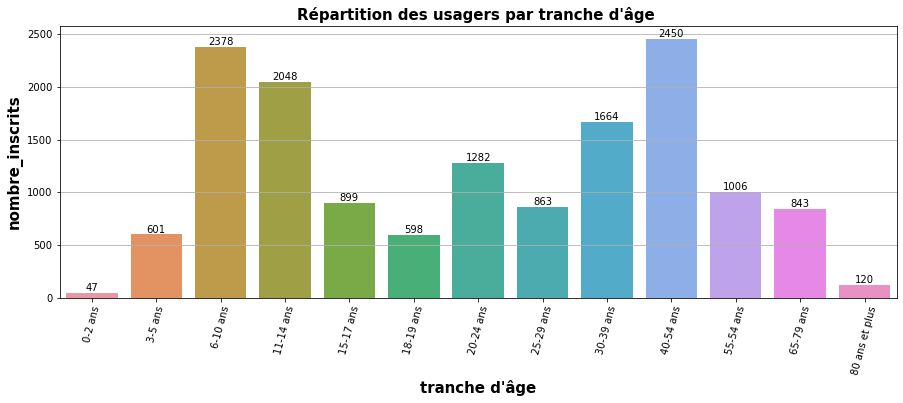

In [104]:
ax = sns.barplot(data=inscrits_par_age,x="tranche d'âge",y="nombre_inscrits")
ax.set_title("Répartition des usagers par tranche d'âge ")
ax.tick_params(axis="x",rotation=75)

for i in ax.containers:
    ax.bar_label(i,)

In [105]:
total_inscrits = inscrits_par_age['nombre_inscrits'].sum()

In [106]:
inscrits_par_age['nombre_inscrits'] = round((inscrits_par_age['nombre_inscrits'] / total_inscrits)*100,1)

In [109]:
inscrits_par_ville = pd.DataFrame(inscrits,columns=["geo_ville"])

In [110]:
# Création d'une colonne pour chaque ville nommée et qui compte le nombre 1 si condition est remplie, sinon O

inscrits_par_ville["Roubaix"] = np.where(inscrits_par_ville["geo_ville"].str.contains("ROUBAIX"),1,0)
inscrits_par_ville["Croix"] = np.where(inscrits_par_ville["geo_ville"].str.contains("CROIX"),1,0)
inscrits_par_ville["Hem"] = np.where(inscrits_par_ville["geo_ville"].str.contains("HEM"),1,0)
inscrits_par_ville["Tourcoing"] = np.where(inscrits_par_ville["geo_ville"].str.contains("TOURCOING"),1,0)
inscrits_par_ville["Wattrelos"] = np.where(inscrits_par_ville["geo_ville"].str.contains("WATTRELOS"),1,0)
inscrits_par_ville["Lys-lez-Lannoy"] = np.where(inscrits_par_ville["geo_ville"].str.contains("LYS-LEZ-LANNOY"),1,0)
inscrits_par_ville["Leers"] = np.where(inscrits_par_ville["geo_ville"].str.contains("LEERS"),1,0)

# Création d'une colonne autre : "Si colonne geo_ville contient au moins une des villes nommées, compter 0, sinon compter 1"

inscrits_par_ville["Autre"] = np.where(inscrits_par_ville["geo_ville"].str.contains("ROUBAIX|CROIX|HEM|TOURCOING|WATTRELOS|LYS-LEZ-LANNOY|LEERS",regex=True),0,1)


inscrits_par_ville["Hors-Roubaix"] = np.where(~inscrits_par_ville["geo_ville"].str.contains("ROUBAIX",regex=True),1,0)

In [111]:
inscrits_par_ville = inscrits_par_ville.drop(labels=["geo_ville"],axis=1)

In [112]:
#inscrits_par_ville

In [113]:
repartition_inscrits_rbx = inscrits_par_ville[['Roubaix','Hors-Roubaix']]
#repartition_inscrits_rbx

In [114]:
repartition_inscrits_rbx = repartition_inscrits_rbx.sum()
#repartition_inscrits_rbx

In [115]:
repartition_inscrits_rbx = pd.DataFrame(repartition_inscrits_rbx)
repartition_inscrits_rbx = repartition_inscrits_rbx.rename(columns={0:'nombre_inscrits'})

In [116]:
inscrits_par_ville = inscrits_par_ville[['Roubaix',
                                         'Croix',
                                         'Hem',
                                         'Tourcoing',
                                         'Wattrelos',
                                         'Lys-lez-Lannoy',
                                         'Leers',
                                         'Autre'
                                        ]]

In [117]:
# On fait la somme des colonnes créées pour obtenir en ligne un total par ville

inscrits_par_ville = inscrits_par_ville.sum()

In [118]:
inscrits_par_ville = inscrits_par_ville.reset_index().rename(columns={"index":"ville d'origine",0:"nombre_inscrits"})

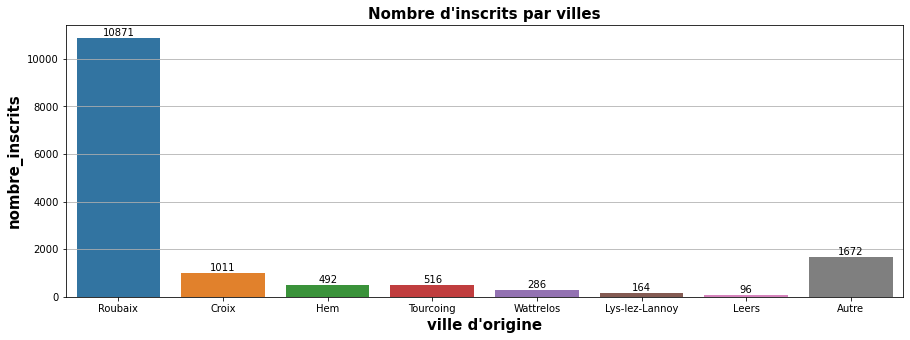

In [119]:
ax = sns.barplot(data=inscrits_par_ville,x="ville d'origine",y="nombre_inscrits")
ax.set_title("Nombre d'inscrits par villes")

for i in ax.containers:
    ax.bar_label(i,)

In [120]:
inscrits_par_ville["pourcentage_inscrits"] = (inscrits_par_ville["nombre_inscrits"] / inscrits_par_ville["nombre_inscrits"].sum())*100
inscrits_par_ville["pourcentage_inscrits"] = inscrits_par_ville["pourcentage_inscrits"].round(1)
#inscrits_par_ville

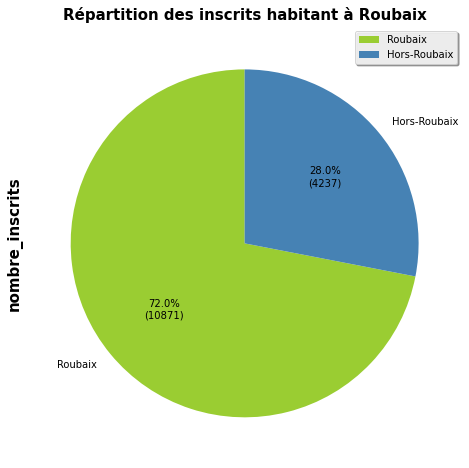

In [121]:
ax = repartition_inscrits_rbx.plot.pie(y='nombre_inscrits',
                                       figsize=(15,8),
                                       autopct=autopct_format(repartition_inscrits_rbx["nombre_inscrits"]),
                                       colors=["yellowgreen","steelblue"],
                                       startangle=90,
                                       center=(0,5)
                                      )

ax.set_title("Répartition des inscrits habitant à Roubaix")
ax = plt.legend()

In [131]:
# Les catégories sont déjà créées, on fait donc juste un groupby().sum()

inscrits_par_sex = inscrits.groupby("sexe")["nombre_inscrits"].sum()

In [133]:
# On transforme le tableau en Dataframe

inscrits_par_sex = pd.DataFrame(inscrits_par_sex)

In [139]:
# On change le nom de chaque ligne de l'index sur la base d'une liste

inscrits_par_sex = inscrits_par_sex.rename(index={'':'Non communiqué','F':'Femme','M':'Homme','N':'Non-pertinent'})

In [143]:
# Suppression des lignes qu'on ne veut pas garder

inscrits_par_sex = inscrits_par_sex.drop(labels=["Non communiqué","Non-pertinent"],axis=0)

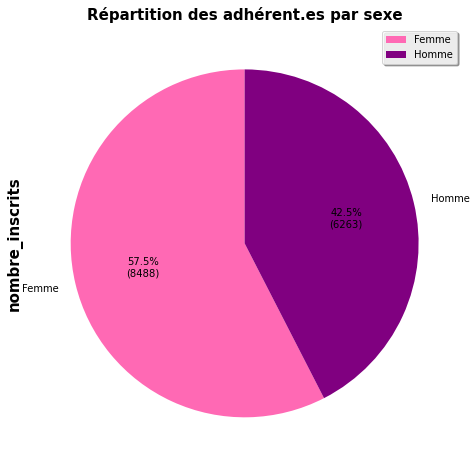

In [145]:
ax = inscrits_par_sex.plot.pie(y='nombre_inscrits',
                               autopct=autopct_format(inscrits_par_sex["nombre_inscrits"]),
                               figsize=(15,8),
                               colors=["hotpink","purple"],
                               startangle=90
                              )
ax.set_title("Répartition des adhérent.es par sexe")
ax = plt.legend()

In [40]:
inscrits_par_site = inscrits.groupby("inscription_code_site")["nombre_inscrits"].sum()

In [41]:
inscrits_par_site = pd.DataFrame(inscrits_par_site)

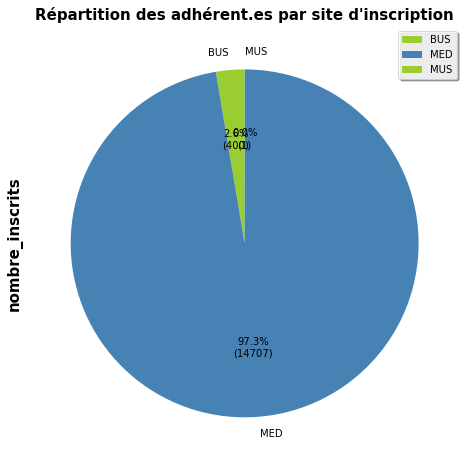

In [42]:
ax = inscrits_par_site.plot.pie(y='nombre_inscrits',
                               autopct=autopct_format(inscrits_par_site["nombre_inscrits"]),
                               figsize=(15,8),
                               colors=["yellowgreen","steelblue"],
                                startangle=90
                               )
ax.set_title("Répartition des adhérent.es par site d'inscription")
ax = plt.legend()

In [43]:
inscrits_fidelite = pd.DataFrame(inscrits,columns=["inscription_fidelite"])

In [44]:
inscrits_fidelite["Moins d'1 an"] = np.where(inscrits_fidelite["inscription_fidelite"]==0,1,0)
inscrits_fidelite["1 an"] = np.where(inscrits_fidelite["inscription_fidelite"]==1,1,0)
inscrits_fidelite["2 ans"] = np.where(inscrits_fidelite["inscription_fidelite"]==2,1,0)
inscrits_fidelite["3 ans"] = np.where(inscrits_fidelite["inscription_fidelite"]==3,1,0)
inscrits_fidelite["4 ans"] = np.where(inscrits_fidelite["inscription_fidelite"]==4,1,0)
inscrits_fidelite["Entre 5 et 10 ans"] = np.where(inscrits_fidelite["inscription_fidelite"].between(5,10),1,0)
inscrits_fidelite["Plus de 10 ans"] = np.where(inscrits_fidelite["inscription_fidelite"]>10,1,0)

In [45]:
inscrits_fidelite = inscrits_fidelite.drop(labels=["inscription_fidelite"],axis=1)

In [46]:
inscrits_fidelite = inscrits_fidelite.sum()

In [47]:
df_inscrits_fidelite = pd.DataFrame(data=inscrits_fidelite,columns=["nombre_inscrits"])
df_inscrits_fidelite = df_inscrits_fidelite.reset_index()

In [48]:
df_inscrits_fidelite.rename({"index":"annee_fidelite"},axis=1,inplace=True)

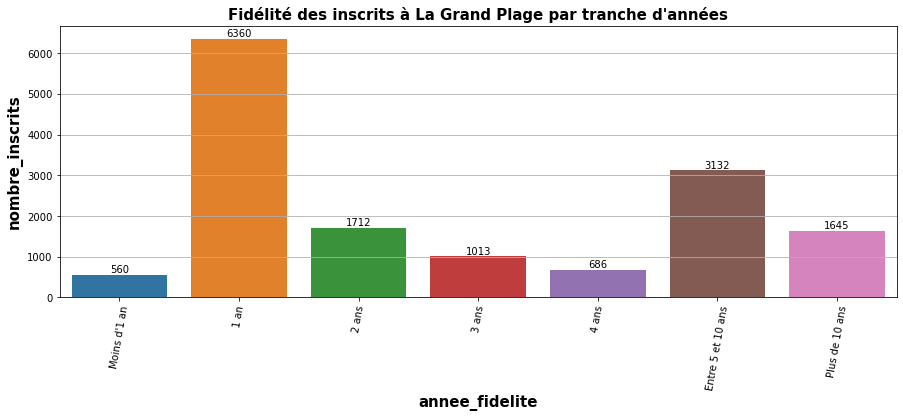

In [49]:
ax = sns.barplot(data=df_inscrits_fidelite,
                 x="annee_fidelite",
                 y="nombre_inscrits")

ax.set_title("Fidélité des inscrits à La Grand Plage par tranche d'années")
ax.tick_params(axis='x',rotation=80)

for i in ax.containers:
    ax.bar_label(i,)

In [50]:
# Création d'un df avec 2 colonnes 'type de carte' et 'nombre d'inscrit

inscrits_par_carte = inscrits.groupby("inscription_code_carte")["nombre_inscrits"].sum().reset_index()

In [51]:
# On remplace l'index numérique par 'inscription_code_carte'

inscrits_par_carte = pd.pivot_table(inscrits_par_carte,
               index="inscription_code_carte",
              values="nombre_inscrits")

In [52]:
#df_inscrits_fidelite

In [53]:
# Comme il n'y a pas beaucoup de lignes à renommer on utilise un dictionnaire avec le paramètre rename.(index=)

inscrits_par_carte.rename(index={"BIBL":"Médiathèque",
                                 "MEDA":"Médiathèque Plus",
                                 "MEDB": "Médiathèque Plus",
                                 "MEDC":"Médiathèque Plus",
                                 "CLAS":"Autre",
                                 "COLI":"Autre",
                                 "COLS":"Autre",
                                 "CSVT":"Autre",
                                 "ECOL": "Autre",
                                 "MEDP":"Autre",
                                 "CSLT":"Consultation\nsur place"},inplace=True) #le \n c'est pour un saut de ligne (que sur la dataviz ça prenne pas 15 km)

In [54]:
# On refait un groupby() pour faire la somme des doublons 'Autre'

inscrits_par_carte = inscrits_par_carte.groupby("inscription_code_carte")["nombre_inscrits"].sum().reset_index()

In [55]:
# On renomme la colonne 'inscription code_carte' par un truc un peu plus compréhensible

inscrits_par_carte.rename(columns={"inscription_code_carte":"Type de carte"},inplace=True)

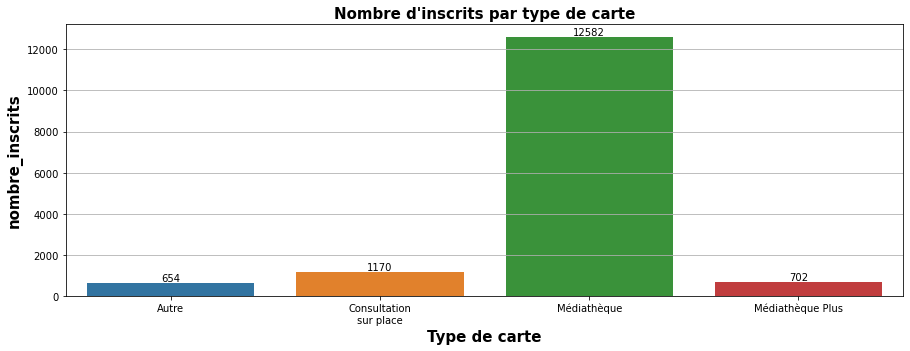

In [56]:
ax = sns.barplot(data=inscrits_par_carte,x="Type de carte",y="nombre_inscrits")
ax.set_title("Nombre d'inscrits par type de carte")


for i in ax.containers:
    ax.bar_label(i,)

In [57]:
#query = """SELECT * FROM statdb.iris_pop"""

In [58]:
#iris = pd.read_sql(query,db_conn)

In [59]:
#total_hab_par_quartier = iris.groupby("irisInsee")["nb_hab"].sum().reset_index()
#total_hab_par_quartier['irisInsee'] = total_hab_par_quartier['irisInsee'].astype(str)

In [60]:
#inscrits_rbx = inscrits[inscrits['geo_ville'] == 'ROUBAIX']
#inscrits_rbx_par_quartier = inscrits_rbx.groupby(['geo_roubaix_iris'])['date_extraction'].count().reset_index()
#inscrits_rbx_par_quartier.columns = ['geo_roubaix_iris', 'nb_inscrits']
#total_hab_par_quartier.columns = ['geo_roubaix_iris', 'nb_hab']
#inscrits_rbx_par_quartier = inscrits_rbx_par_quartier.merge(total_hab_par_quartier, how='left', on='geo_roubaix_iris')
#inscrits_rbx_par_quartier